<a href="https://colab.research.google.com/github/ikalisa1/DSA-HW02---Sparse-Matrix/blob/master/Group7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Poisson Distribution: Probability Analysis



### 1.  Introduction

---

```
# This is formatted as code
```


The poisson dustribtion model is used to model the number of times an event will happen within a fixed period of time or space. This is commonly applied when the average event is know and its independent. Example, if Omar finishes 10 leetcode challenges everyday, what is the probability he finishes 12 on Monday?

The Probalility mass function (PMF) of the Poisson distribution is given by:

            P(X=k) = lamda^k * e^ - lambda/ factorial of k

where:  
  *   lambda is the mean(average) number of occurrence
  *   k  is the actual occurrence we are interested to find
  *   e is the Euler's number (~2.71828)

  

### 2. Problem

---
A woman sells an average of 12 bags of rice per day. We want to determine the probability that she sells exactly 8 bags on a given day.

Given:
  * lambda = 12
  * k = 8

### 3. Code below

Sum of probabilities: 0.945178 (should be close to 1)


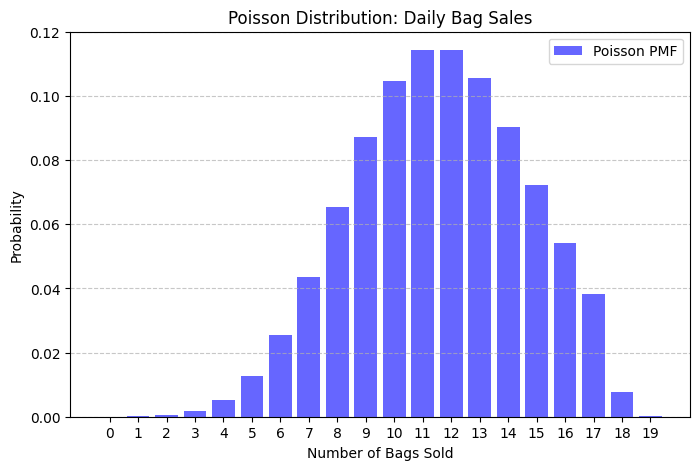

In [ ]:
import numpy as np # we are gonna use this for the poisson claculations
import matplotlib.pyplot as plt # to visualize or answers
import math # we use this for maths functions

lambda_ = 12 #this is the average number of bags she sells daily
k = 8 # but we are going to find the probalility of selling each valuse from 0 to 15

#we are going to name our possible values as x
x = np.arange(0, 20) # 1 -15 bags

# y -> our probalility (poission)
y = (np.exp(-lambda_) * (lambda_ ** x))/ np.array([math.factorial(i) for i in x])

# Sanity check: Sum of probabilities should be ~1
print(f"Sum of probabilities: {np.sum(y):.6f} (should be close to 1)")

# visualizing our poisson distribution
plt.figure(figsize=(8, 5))
plt.bar(x, y, color='blue', alpha=0.6, label='Poisson PMF')
plt.xlabel('Number of Bags Sold')
plt.ylabel('Probability')
plt.title('Poisson Distribution: Daily Bag Sales')
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


# Key Observations from the Poission Visualization

### - The graph is right skewed meaning the probalility drops faster for higher values, eg..... comparing the probabilty of selling 8 bags and probability of selling 16 bags

### - the highest is 12 which is our average(lamda)

### - The probalility decreases as we move fro 12 both left and right but right decreases faster since it is right skewed

### - this helps the woman to predict demand and also avoid stock shortage and overstocking, like selling over 20 bags

# Part 2: Bayesian Probability: Weather Prediction



### 1.  Introduction

---

Bayesian probability allows us to update our beliefs based on new evidence. In weather prediction, this can help us refine our forecast as we incorporate real-time observations. Using Bayes' theorem, we adjust our initial (prior) probability of an event—in this case, rain—after observing new evidence, such as the presence of clouds.

Bayes' Theorem is defined as:


           P(A|B) = ( P(B|A) * P(A) ) / P(B)


where:

- P(A) is the prior probability (initial belief before evidence).
- P(B∣A) is the likelihood (chance of observing evidence if the event is true).
- P(B) is the overall probability of observing the evidence.
- P(A∣B) is the posterior probability (updated belief after seeing evidence).


### 2. Problem

---
Given the following data:

* P(Rain) = 0.3
* P(Clouds | Rain) = 0.9
* P(Clouds | No Rain) = 0.4
* P(No Rain) = 0.7

We want to determine the probability that it is actually raining given that we observe clouds, i.e., compute P(Rain∣Clouds).

### 3. Code below

In [ ]:

# Given probabilities
P_rain = 0.3 # Prior probability of rain
P_no_rain = 1 - P_rain # Complement: probability of no rain

P_clouds_given_rain = 0.9 # Likelihood: probability of clouds when it's raining
P_clouds_given_no_rain = 0.4 # Likelihood: probability of clouds when it's not raining

# Calculate the total probability of observing clouds (Evidence)
P_clouds = (P_clouds_given_rain * P_rain) + (P_clouds_given_no_rain * P_no_rain)

# Apply Bayes' Theorem to compute the posterior probability of rain given clouds
P_rain_given_clouds = (P_clouds_given_rain * P_rain) / P_clouds

print(f"P(Clouds): {round(P_clouds, 2)}")
print(f"P(Rain | Clouds): {round(P_rain_given_clouds, 2)}")



P(Clouds): 0.55
P(Rain | Clouds): 0.49


# Interpretation

- Before the clouds we have a **30%** chance of rain
- After observing the clouds, our belief **increases** to about **49%** because clouds are more likely when it rains than when it doesn't.

- However, it’s still not a **100%** certainty, since clouds can form even on dry days.

# Part 3: Gradient Descent in Code



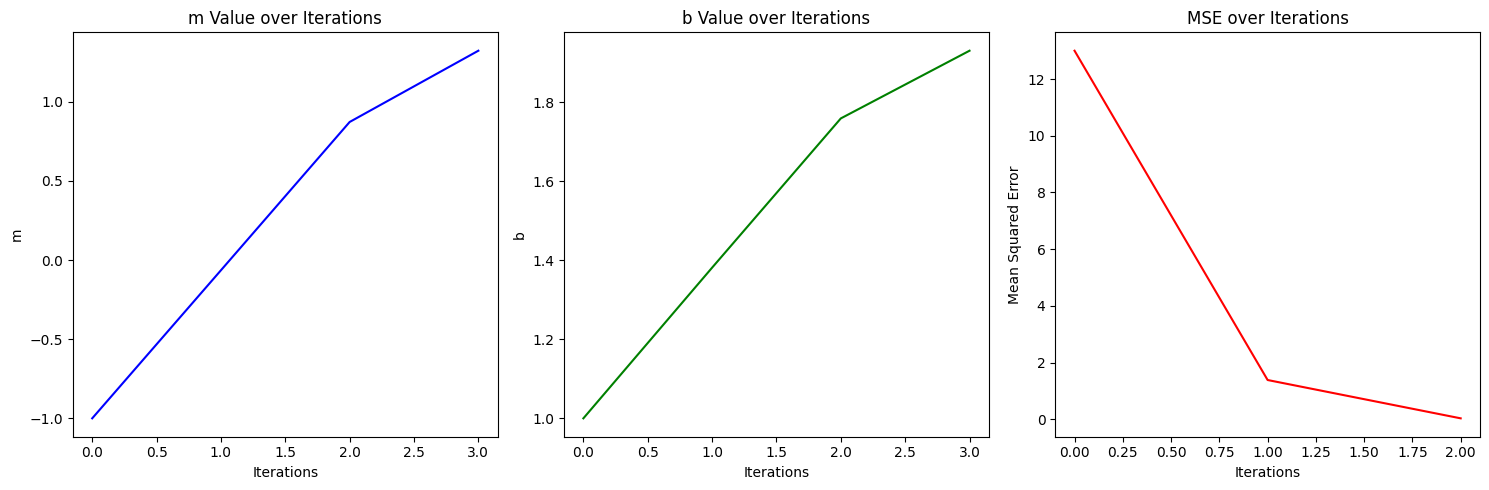

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Data points from the manual calculation
X = np.array([1, 3])
Y = np.array([3, 6])

# Initial values of m and b
initial_params = [-1, 1]

# Function to compute predictions
def predict(m, b, X):
    return m * X + b

#compute Mean Squared Error (MSE)
def cost_function(params):
    m, b = params
    Y_pred = predict(m, b, X)
    error = Y_pred - Y
    mse = np.mean(error ** 2)
    return mse

# This is how we're going to track our m_values
m_values = [initial_params[0]]
b_values = [initial_params[1]]


# we're also going to track our error
error_values = []

# Learning rate and stopping tolerance
learning_rate = 0.1
max_iterations = 3

prediction_at_each_iteration = []

# Iterate over the number of desired iterations
for i in range(3):
    # Use scipy's minimize function to find optimal parameters (m and b)
    result = minimize(cost_function, initial_params, method='BFGS', options={'disp': False, 'maxiter': 1})

    # Extract optimized parameters (m, b) from the result
    m_optimized, b_optimized = result.x

    # Track the parameters and error
    # if not we're just going to take the first mean
    Y_pred = predict(m_optimized, b_optimized, X)
    prediction_at_each_iteration.append((m_optimized, b_optimized, Y_pred))
    error = Y_pred - Y
    mse = np.mean(error ** 2)

    # Store values for plotting
    m_values.append(m_optimized)
    b_values.append(b_optimized)
    error_values.append(mse)

    # Update initial parameters for the next iteration
    initial_params = [m_optimized, b_optimized]


# Visualization of how m, b, are changing over time
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot for m values
ax[0].plot(m_values, label='m values', color='blue')
ax[0].set_title('m Value over Iterations')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('m')

# Plot for b values
ax[1].plot(b_values, label='b values', color='green')
ax[1].set_title('b Value over Iterations')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('b')

# Plot for MSE values
ax[2].plot(error_values, label='MSE', color='red')
ax[2].set_title('MSE over Iterations')
ax[2].set_xlabel('Iterations')
ax[2].set_ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()


# Plots for each prediction


fig, axes = plt.subplots(1, len(prediction_at_each_iteration), figsize=(15, 5))

